
<h1 style="color:green; text-align:center;margin-top:5%">
    Baggin & Random forest 
</h1>

---

<p style="text-align:center; font-size:17px">
    Anthony de los Santos
</p>


<h2 style="padding:2%;margin-left:2%; font-size:20px"> 
    <b style="color:green">+</b> Baggin, Boostrap agregation.
</h2>
 
 

In [1]:
# import de paquetes 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# paquete para trabajar con árboles de decisión 

from sklearn import tree

# Para dividir nuestro dataset en Train_set, test_set. 

from sklearn.model_selection import train_test_split


### Baggin aplicado en "Hitters.csv" 



- Antes de aplicar Bagging, se estudia árbol de regresión para el dataset Hitters.csv

Este dataset es usado para introducir el tema de árboles de regresión en el capitulo 8.1 

In [2]:
# Cargamos el dataset 

hitters = pd.read_csv("Hitters.csv")

hitters.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
#
# Habrá que filtrar los datos faltantes en "Salary" y después de eso, aplicar log("Salary")
#

# Se filtran los datos "NaN"
hitters = hitters.dropna()  

# Se agrega una columna a nuestro dataSet, "logSalary", que será el resultado de aplicar log("Salary")
logSalary = pd.DataFrame({"logSalary" : hitters["Salary"].transform( np.log )})
hitters = hitters.join( logSalary )

hitters.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,logSalary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.0,A,6.620073


- De aquí en delante, se trabajará para aplicar el método de árbol de regresión. 

Podríamos decir que lo anterior fue *"limpiar"* nuestro conjunto de datos descartando datos faltantes (NaN) y pasando a logaritmo los datos en Salary, para un mejor ajuste/entendimiento. 

In [8]:
#
#     Train test split 
#

X = pd.DataFrame({ "Puntos": hitters["Hits"], "Años": hitters["Years"] })
y = hitters["logSalary"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
 

[Text(167.4, 181.2, 'Años <= 4.5\nmse = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(83.7, 108.72, 'Hitts <= 15.5\nmse = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(41.85, 36.23999999999998, 'mse = 0.176\nsamples = 2\nvalue = 7.243'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.371\nsamples = 88\nvalue = 5.058'),
 Text(251.10000000000002, 108.72, 'Hitts <= 117.5\nmse = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(209.25, 36.23999999999998, 'mse = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(292.95, 36.23999999999998, 'mse = 0.252\nsamples = 83\nvalue = 6.74')]

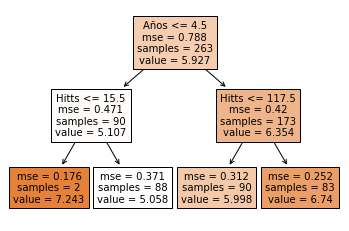

In [40]:
#
# Árbol de regresión en hitters... 
#

ar = tree.DecisionTreeRegressor(max_depth = 2)  

# Aplicamos el método en X_train, y_train
ar.fit(X,y)

# Predicción aplicado en X_test.
prediccion = ar.predict(X_test)

tree.plot_tree(ar, feature_names=["Hitts","Años"], filled=True)


Similar a la figura 8.1 en el capitulo 8.


- A continuación un *intento* de mostrar la varianza en el método al "variar" el train_set. 
Esto estará a discusión. La alta varianza en los métodos de árboles, al "modificar" el train_set la predicción puede ser distinta. 


 Primeras 4 predicciones en X_test ... 
[5.78557773 5.78557773 6.6635935  6.6635935 ]  Utilizando X2_train como train_set 
[5.99837985 5.99837985 6.73968692 5.05822803]  El ejemplo inicial, X_train como train_set 


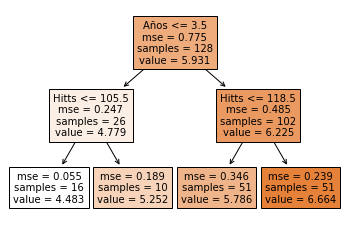

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.30)


ar2 = tree.DecisionTreeRegressor(max_depth = 2)  

# Aplicamos el método en X2_train, y2_train
ar2.fit(X2_train,y2_train)

# Predicción aplicado en X_test.
prediccion2 = ar2.predict(X_test)

tree.plot_tree(ar2, feature_names=["Hitts","Años"], filled=True)

print(" Primeras 4 predicciones en X_test ... ")
print(prediccion2[:4]," Utilizando X2_train como train_set ")
print(prediccion[:4]," El ejemplo inicial, X_train como train_set ")


### + Aplicando Bagging 

- Para esta parte, tomo en cuenta el error MSE en test_set. Para diferenciar entre los métodos (Árboles de regresión, Bagging, OOB, Random Forest, Random Forest OOB ).

Esto es, tenemos un conjunto para prueba, $y_{test}$ = y_test y la predicción $\hat{y}_{test}$ = método_prediccion()

Se trata de verificar la diferencia de errores en cada método. 

In [39]:
# Métricas, MSE.

from sklearn.metrics import mean_squared_error

# MSE  en árbol de regresión 
error_ar = mean_squared_error( y_test, prediccion )

error_ar


0.30264182897606023

#### Bagging en Hitters.csv

Ahora si, se aplica el método de Bagging a nuestro dataset Hitters.csv 

In [157]:
#
# Importamos los paquetes para trabajar con Bagging. 
#

from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor( n_estimators = 250, 
                      max_samples = int(X_train.shape[0]*0.7), 
                      max_features = X_train.shape[1],                    
                     )

# Aplicamos el método en X,y
br.fit(X_train,y_train) 

B_prediccion = br.predict(X_test)

print("Primeras 4 predicciones: ", B_prediccion[:4] )



Primeras 4 predicciones:  [5.92148102 5.67787849 6.94958011 6.4295198 ]


In [158]:
# MSE en bagging... 

error_br = mean_squared_error( y_test, B_prediccion )
error_br 


0.28779532059921065

### OOB, Out-of-bag. 

In [161]:

oobr = BaggingRegressor( n_estimators = 250,
                        max_samples = int(X_train.shape[0]*0.7), 
                        max_features = X_train.shape[1],
                        oob_score = True )

# Aplicamos el método en X,y
oobr.fit(X_train,y_train) 

OOB_prediccion = oobr.predict(X_test)

print("Primeras 4 predicciones: ", OOB_prediccion[:4] )


Primeras 4 predicciones:  [5.90459959 5.65209763 6.94963485 6.42616899]


In [162]:
# Error en OOB

error_oob = mean_squared_error(y_test, OOB_prediccion)
error_oob

0.2826470457633959

<h2 style="padding:2%;margin-left:2%; font-size:20px"> 
    <b style="color:green">+</b> Bosque aleatorio (Random forest).
</h2>

In [165]:
# Import de paquetes para trabajar con Random forest. 

from sklearn.ensemble import RandomForestRegressor   # Caso para regresión ...


In [166]:
rf = RandomForestRegressor( n_estimators = 250,
                           max_samples = int(X_train.shape[0]*0.7), 
                           max_features = X_train.shape[1],         
                          )

rf.fit(X_train,y_train)

rf_prediccion = rf.predict(X_test)

rf_prediccion[:4]

array([5.86068358, 5.67474175, 6.88502765, 6.42056202])

In [167]:
# Error en random forest

error_rf = mean_squared_error( y, rf.predict(X) )
error_rf

0.15174743506415278

### Variable importance 

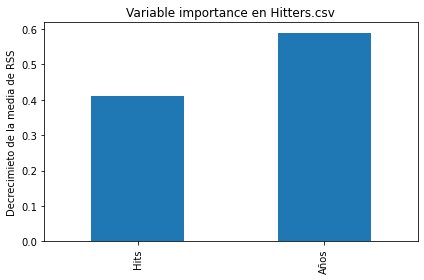

In [168]:
# Var importance 

vImportance  = rf.feature_importances_
v_importance = pd.Series( vImportance, index=["Hits","Años"])

fig, ax = plt.subplots()
v_importance.plot.bar()

ax.set_title("Variable importance en Hitters.csv")
ax.set_ylabel("Decrecimieto de la media de RSS")

fig.tight_layout()



In [169]:
# Random forest con OOB
rf_oob = RandomForestRegressor( n_estimators = 250 ,
                               max_samples = int(X_train.shape[0]*0.7), 
                               max_features = X_train.shape[1],         
                               oob_score = True )
rf_oob.fit(X_train,y_train)
rfoob_prediccion = rf_oob.predict(X_test)

# Error en random forest con OOB
error_rfoob = mean_squared_error(y, rf_oob.predict(X))
error_rfoob


0.15310679474581085

In [170]:
# Errores juntos. 

# [Error con árbol de regresión, error con Bagging, error con Random forest, error OOB, error Random forest OOB.]
x_err = ["error_ar", "error_br", "error_rf", "error_oob", "error_rfoob"]
y_err = [error_ar, error_br, error_rf, error_oob, error_rfoob] 

y_err




[0.30264182897606023,
 0.28779532059921065,
 0.15174743506415278,
 0.2826470457633959,
 0.15310679474581085]

<ipython-input-171-98a9a9b9b22d>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(" Errores  ", fontSize=17, Color="red")
<ipython-input-171-98a9a9b9b22d>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Errores en cada método", fontSize=13)
<ipython-input-171-98a9a9b9b22d>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel(" MSE ", fontSize=13)


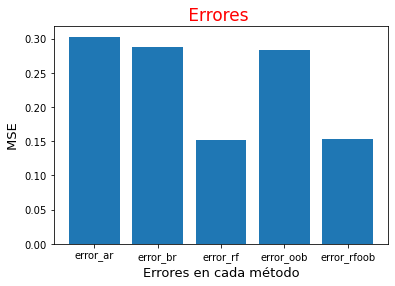

In [171]:
#
# Para tener una idea, un plot básico
#


plt.bar(x_err,y_err)
plt.title(" Errores  ", fontSize=17, Color="red")
plt.xlabel("Errores en cada método", fontSize=13)
plt.ylabel(" MSE ", fontSize=13)
plt.show()

 